### 卷积的简单介绍

<center><img src="same_padding_no_strides.gif" alt="FAO" width="200"></center>

In [3]:
from imutils import *

### Erosion腐蚀
其原理是在原图的小区域内取局部最小值,其函数是cv2.erode()。这个核也叫结构元素，因为形态学操作其实也是应用卷积来实现的,结构元素可以是矩形/椭圆/十字形，可以用cv2.getStructuringElement()来生成不同形状的结构元素，比如：

In [4]:
# 矩形
kernel1 = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
print(kernel1)

[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]


In [5]:
# 椭圆
kernel2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
print(kernel2)

[[0 0 1 0 0]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [0 0 1 0 0]]


In [6]:
# 十字形
kernel3 = cv2.getStructuringElement(cv2.MORPH_CROSS, (5,5))
print(kernel3)

[[0 0 1 0 0]
 [0 0 1 0 0]
 [1 1 1 1 1]
 [0 0 1 0 0]
 [0 0 1 0 0]]


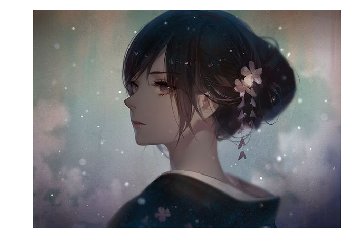

In [7]:
image = imread('image.jpg')
show(image)

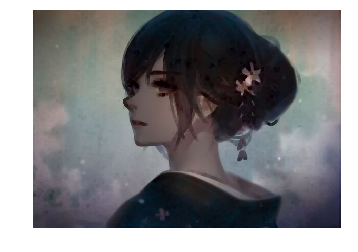

In [8]:
erosion = cv2.erode(image, kernel1)
show(erosion)

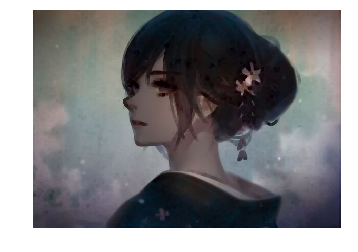

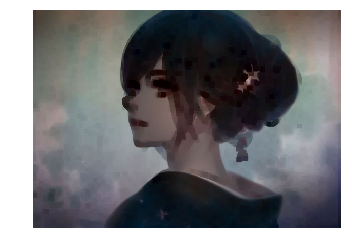

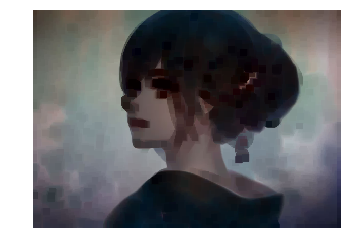

In [9]:
for i in range(3):
    erosion = cv2.erode(image, kernel1, iterations=i+1)
    show(erosion)

### Dilation膨胀
膨胀与腐蚀相反，取的是局部最大值。cv2.dilate()

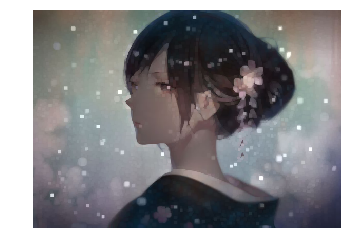

In [11]:
dilation = cv2.dilate(image, kernel1)
show(dilation)

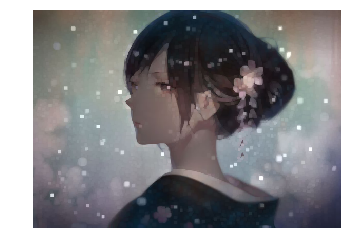

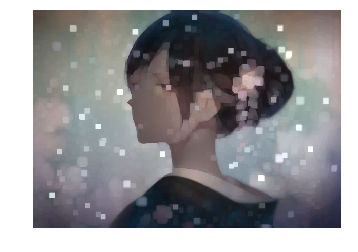

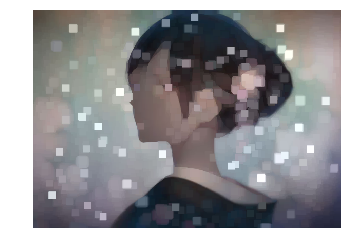

In [12]:
for i in range(3):
    dilation = cv2.dilate(image, kernel1, iterations=i+1)
    show(dilation)

### Opening开运算
先腐蚀后膨胀叫开运算，其作用是消除小白点。这类形态学操作用cv2.morphologyEx()函数实现

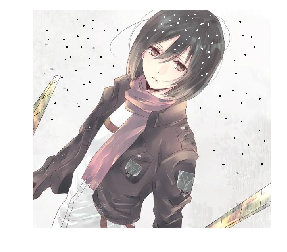

In [13]:
image2 = imread('image2.jpg')
show(image2)

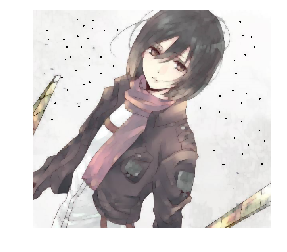

In [14]:
# 去除白点
opening = cv2.morphologyEx(image2, cv2.MORPH_OPEN, kernel1)
show(opening)

### Closing闭运算
闭运算则相反：先膨胀后腐蚀。其作用是消除小黑点。

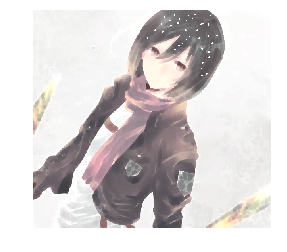

In [15]:
# 去除黑点
closing = cv2.morphologyEx(image2, cv2.MORPH_CLOSE, kernel1)
show(closing)

### 先开运算再闭运算

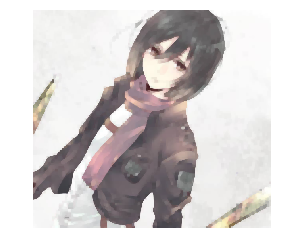

In [16]:
opening = cv2.morphologyEx(image2, cv2.MORPH_OPEN, kernel1)
closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel1)
show(closing)

### Gradient形态学梯度
膨胀图减去腐蚀图，dilation - erosion，得到物体的轮廓

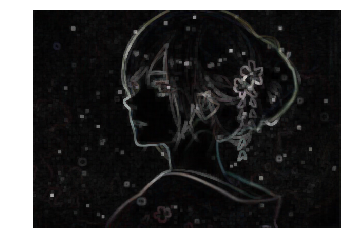

In [17]:
gradient = cv2.morphologyEx(image, cv2.MORPH_GRADIENT, kernel1)
show(gradient)

### Top Hat顶帽/White Hat白帽
原图减去开运算后的图：src - opening

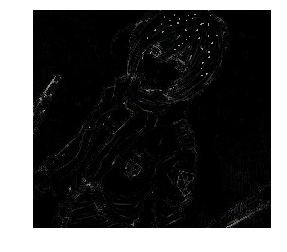

In [18]:
tophat = cv2.morphologyEx(image2, cv2.MORPH_TOPHAT, kernel1)
show(tophat)

### Black Hat黑帽
闭运算后的图减去原图：closing - src

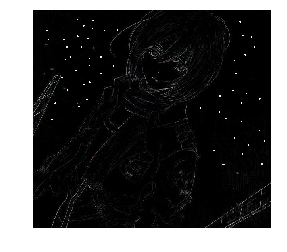

In [19]:
blackhat = cv2.morphologyEx(image2, cv2.MORPH_BLACKHAT, kernel1)
show(blackhat)